In [1]:
#importing all needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson
from math import sqrt, pi, erf
import pandas as pd
from scipy import optimize


1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414
Probability to have 15 hurricanes in a year 0.0013726297097147906


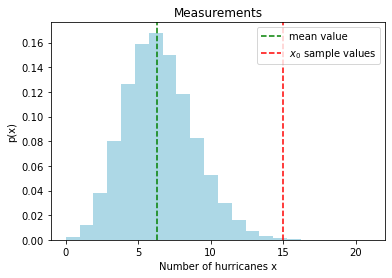

In [2]:
#Task 1

x0=15 #number of hurricanes
mu=6.3 #average of hurricanes per year

sigma=poisson.std(mu, loc=0)#calculating std 

Z = abs(x0 - mu) / sigma
print("Z =", Z)

#Probability calculation of the PMF Poisson
prob= stats.poisson.pmf(k=15,mu=mu)
print("Probability to have 15 hurricanes in a year", prob)

# plot the measurement and its assumed pdf
#Right tailed test? prob Z>3 as H1
w = mu - x0
x = stats.poisson.rvs(mu=mu, loc=0, size=1000000)
plt.hist(x, bins=22, density=True, color='lightblue')
plt.axvline(mu, linestyle='--', color='green', label='mean value')
plt.axvline(x0, linestyle='--', color='red', label=r'$x_0$ sample values')
plt.title("Measurements")
plt.xlabel('Number of hurricanes x')
plt.ylabel("p(x)")
plt.legend()
plt.show()




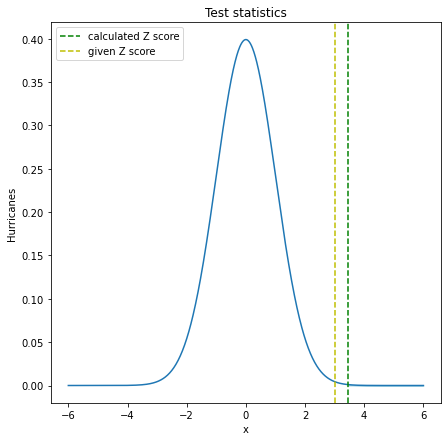

p-value  0.00026397158691493505


In [3]:
# Ploting test statistics + pdf
#Test statistics follow normal distribution

xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.figure(figsize=(7,7))
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=xs > Z, color='lightblue')
plt.axvline(Z, linestyle='--', color='g', label='calculated Z score')
plt.axvline(3, linestyle='--', color='y', label='given Z score')
plt.title("Test statistics")
plt.ylabel("Hurricanes")
plt.xlabel("x")
plt.legend()
plt.show()


# calculate the p-value
pvalue = 1. - stats.norm.cdf(Z)
print("p-value ", pvalue)


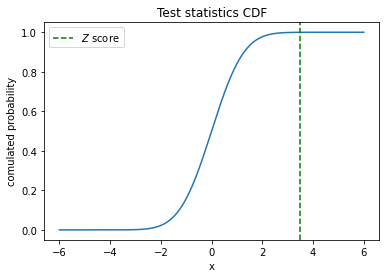

The signaficance level aplpha calculated using the specific Z-score=3 is:  0.0013498980316301035
p-value:  0.00026397158691493505


In [4]:
#plot the Gaussian Comulative Distribution Function - cdf 
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='green', label=r'$Z$ score')
#plt.axvline(-Z, linestyle='--', color='blue', label=r'$-Z$ score')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.ylabel('comulated probability')
plt.legend()
plt.show()

# calculate the p-value
pvalue = 1. - stats.norm.cdf(Z)
alpha=  1. - stats.norm.cdf(3)#in the text is written that Z score=3
print("The signaficance level aplpha calculated using the specific Z-score=3 is: ", alpha)
print("p-value: ", pvalue)

In [5]:
#Comment
#Probability that in year will be 15 or more hurricanes is 0.00026397 or 0.026397% which is significantly 
#less than alpha value=0.001349898, so in this case we can reject null hypothesis and say that is not likely
#to observe 15 or more hurricanes in single year. 

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


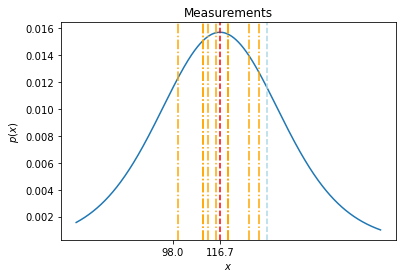

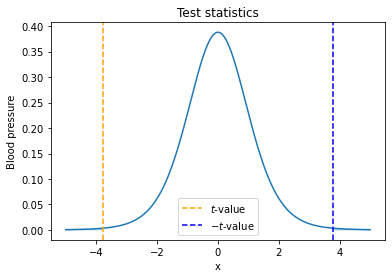

p-value = 0.004302464132864604


In [6]:
#Task 2

#Data set with blood pressure before exposure to halogen lamps
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
#Data set with blood pressure after exposure to halogen lamps
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = sqrt((sigma_1**2 + sigma_2**2)/2)
n = len(post)
x1 = np.mean(pre)
x2 = np.mean(post)

T = (x1 - x2) / (sigma*sqrt(2/n))
print("T =",T)

w= x1-x2
#plot the measurents
x = np.linspace(60, 180, 1000)
y = stats.t.pdf(x, loc=x1, scale=sigma / np.sqrt(2/n), df=n - 1)
plt.plot(x, y)
plt.axvline(x1, linestyle='--', color='red')
for l in pre:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(x2, linestyle='--', color='lightblue')
plt.xticks([x1, x1 + w], [x1, x1 + w])
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n-1)
fig = plt.figure()
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs)>np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange', label=r'$t$-value')
plt.axvline(-T, linestyle='--', color='blue', label=r'$-t$-value')
plt.title("Test statistics")
plt.ylabel("Blood pressure")
plt.xlabel("x")
plt.legend()
plt.show()


p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", p_value)



In [7]:
#Comment:

#In this case p-value < alpha/2 so, we reject the null hypothesis.
#This implies that the change in blood pressures before and after exposure of the halogen lightning
#was significant.

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

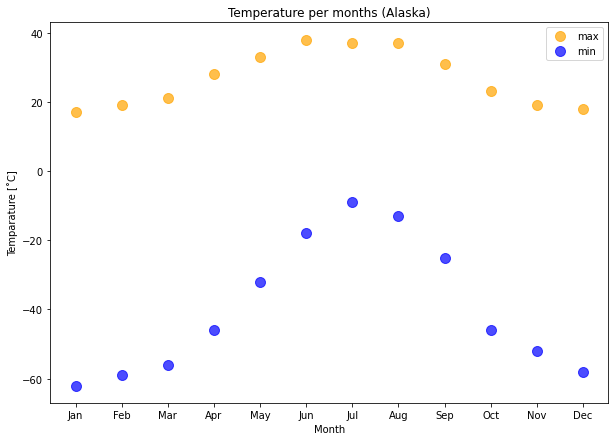

Curve fitting for Tmax
Offset = 15.78 +- 1.18
Time Offset = 2.29 +- 0.17
Curve fitting for Tmin
Offset = -61.32 +- 1.19
Time Offset = 6.16 +- 0.05


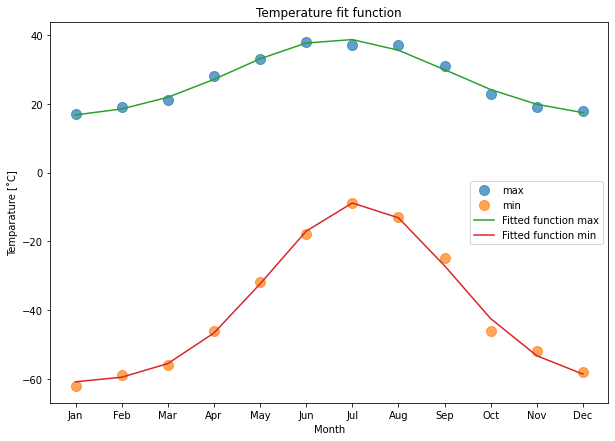


The overall average of minimum temperature is: -39.7 °C

The overall average of maximum temperature is: 26.8 °C


In [11]:
#Task 3 
from scipy.optimize import curve_fit

maxs = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mins = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plotting data of minimum and max temperature
plt.figure(figsize=(10,7))
plt.plot(months, maxs,'o', label='max', color='orange',markersize=10, alpha=0.7)
plt.plot(months, mins,'o', label='min', color='blue', markersize=10, alpha=0.7)
plt.title("Temperature per months (Alaska)")
plt.xlabel('Month')
plt.ylabel('Temparature [˚C]')
plt.legend()
plt.show()

#Fiiting temperatures with curve
plt.figure(figsize=(10,7))
plt.plot(months, maxs,'o', label='max', markersize=10, alpha=0.7)
plt.plot(months, mins,'o', label='min', markersize=10, alpha=0.7)

def gaussian(x, mu, sig, ampl, offset):
    return offset + ampl * stats.norm.pdf(x, mu, sig)

opt_max, cov_max = curve_fit(gaussian, range(12), maxs, p0=[6,1,20,40])
opt_min, cov_min = curve_fit(gaussian, range(12), mins, p0=[6,1,0,-60])

#print(cov_max)
print('Curve fitting for Tmax')
print("Offset = %.2f +- %.2f" % (opt_max[-1], np.sqrt(cov_max[-1,-1])))
print("Time Offset = %.2f +- %.2f" % (opt_max[1], np.sqrt(cov_max[1,1])))
print('Curve fitting for Tmin')
print("Offset = %.2f +- %.2f" % (opt_min[-1], np.sqrt(cov_min[-1,-1])))
print("Time Offset = %.2f +- %.2f" % (opt_min[0], np.sqrt(cov_min[0,0])))

#print(opt_max[-1])#offset param for the max
#print(opt_min[-1])#offset param for the min

plt.plot(months, gaussian(range(12), opt_max[0], opt_max[1],opt_max[2],opt_max[3]),label='Fitted function max')
plt.plot(months, gaussian(range(12), opt_min[0], opt_min[1],opt_min[2],opt_min[3]),label='Fitted function min')
plt.title("Temperature fit function")
plt.xlabel('Month')
plt.ylabel('Temparature [˚C]')
plt.legend()
plt.show()


print('\nThe overall average of minimum temperature is: {:1.1f} °C'.format(np.mean(mins)))
print('\nThe overall average of maximum temperature is: {:1.1f} °C'.format(np.mean(maxs)))

#Comment: 
#It can be seen from the last graphs that
#Fitted function gives reasonable solution for the temperature data.



In [12]:
#Comment: 
#Fitted function gives reasonable solution for the temperature data.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

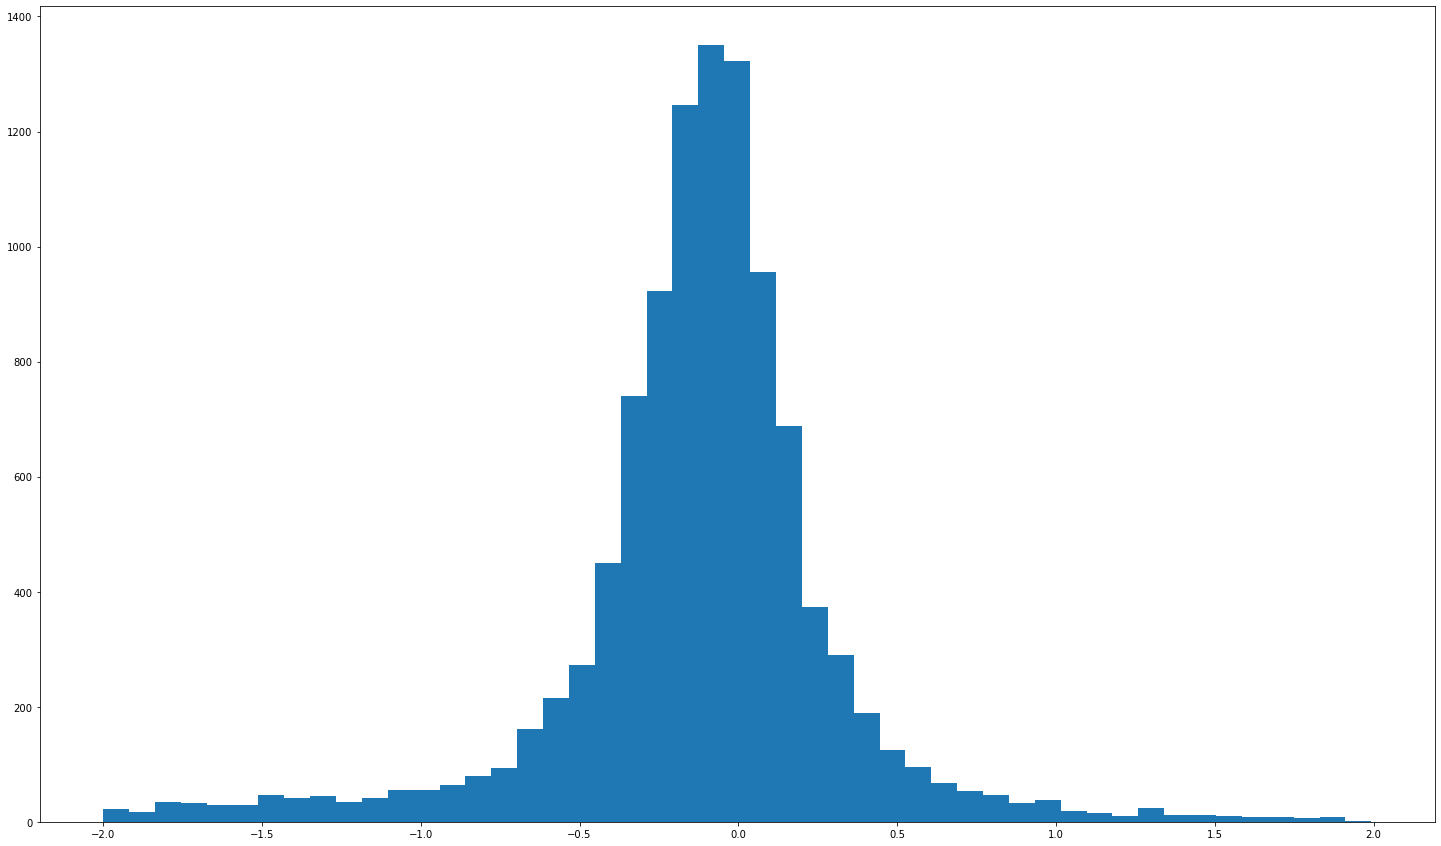

In [14]:
# !type data\residuals_261.pkl 
df= pd.read_pickle("data/residuals_261.pkl")
df= pd.DataFrame(df.item())
x= df['residuals']
#x=np.array(residual)


# Filtter data  to better understand the data
x = df.loc[(df['residuals'] > -2) & (df['residuals'] < 2)]['residuals']
plt.figure(figsize=(25,15))
y,bins,_ =plt.hist(x, bins=np.linspace(x.min(), x.max()))



In [15]:
gauss = lambda x, a, mu, sigma,b : a*stats.norm.pdf(x, mu, sigma)+ b

# bin centers
bin_centers = 0.5*(bins[1:]+bins[:-1])

# set Poisson uncertainty for each bin   
poisson_err =  np.sqrt(np.abs(y))

# curve fitting 
par, cov = optimize.curve_fit(gauss,xdata = bin_centers, ydata = y, sigma = poisson_err) 

No handles with labels found to put in legend.


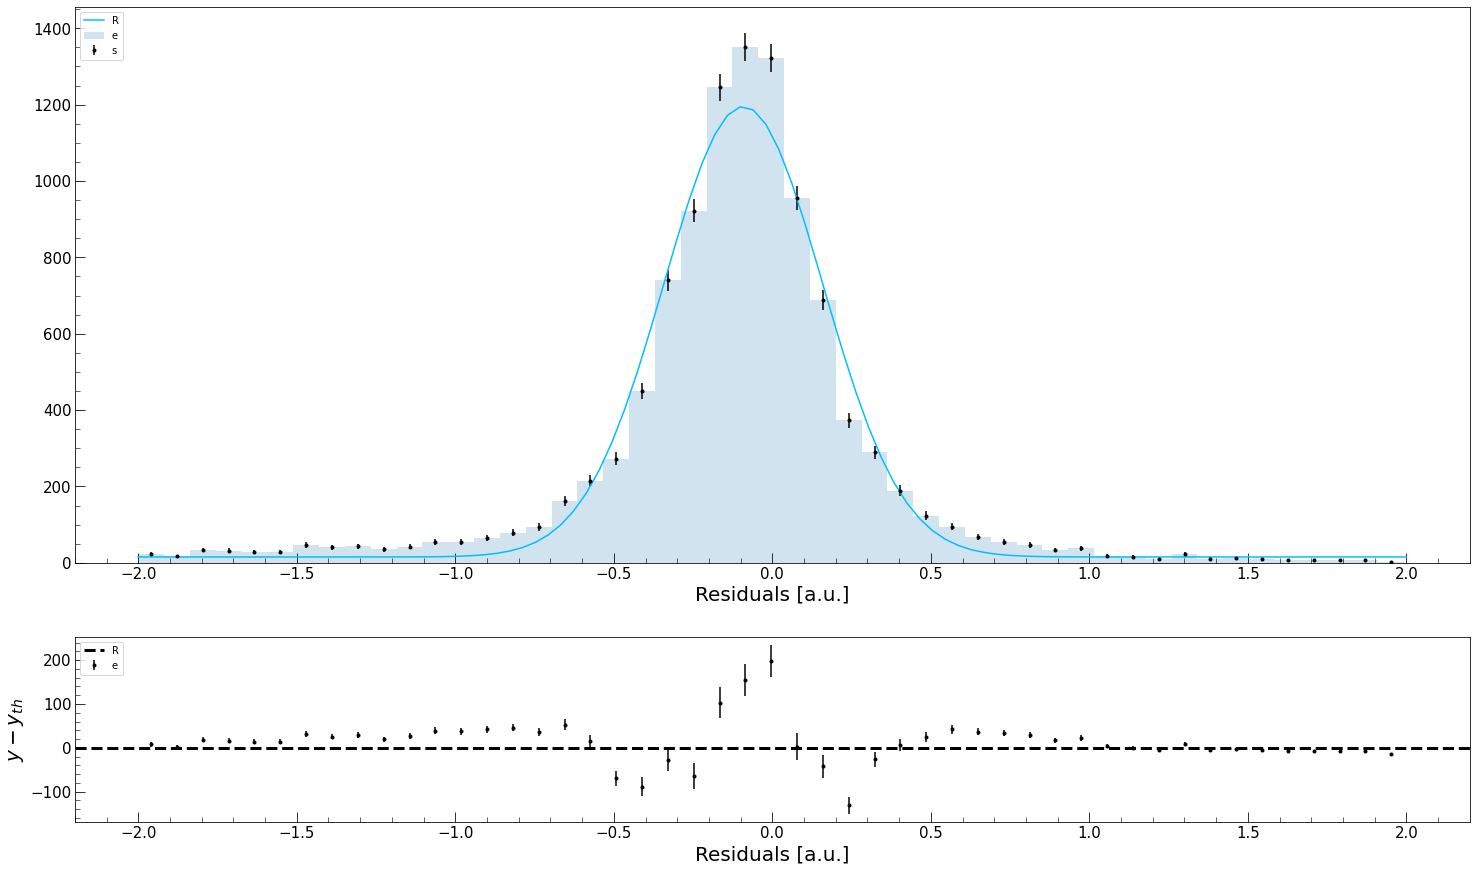

In [16]:
from matplotlib import cm, style,gridspec
# ploting the results
r = np.linspace(-2,2,100)
fig = plt.figure(figsize=(25,15))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

ax1.hist(x, bins=np.linspace(x.min(), x.max()), alpha = 0.2)
ax1.errorbar(bin_centers, y, yerr=poisson_err,fmt='.k', label = 'Estimated Error')
ax1.plot(r, gauss(r,*par), color = 'deepskyblue', label = 'Gaussian Fitted curve')
plt.legend(loc='upper left')


y_th = gauss(bin_centers, *par)
residual = y - y_th

ax2.errorbar(bin_centers, residual, yerr = poisson_err, fmt='.k')
ax2.axhline(color = 'black', linewidth = 3, linestyle = '--')
ax2.set_ylabel('$y-y_{th}$', fontsize = 20) 

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Residuals [a.u.]', fontsize = 20)                             
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.legend('Residual', loc='upper left')


In [17]:
ssr = np.sum((residual)**2)
tss = np.sum((np.mean(n) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(bin_centers,y)) 

R2 = 0.9840642247026703 
R = 0.9920001132573878
Covariance matrix:
 [[ 1.         -0.06109374]
 [-0.06109374  1.        ]]


In [18]:
# set the number of degrees of freedom
ndof = len(y) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
sigma_y = np.sqrt(np.abs(y))
chi2 =np.sum(((residual)**2) / sigma_y)
print("chi2 =", chi2)

# calculate the p-value
p_value = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", p_value)

n degrees of freedom = 48
chi2 = 6887.492847596126
p-value = 0.0


In [ ]:
#Comment:
#Because p-value=0 means that we reject the null hypothesis,
#therefore our fit function does not represents the data and the fit is not satisfactory.

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

         year       temp
0  1995.00274   0.944444
1  1995.00548  -1.611110
2  1995.00821  -3.555560
3  1995.01095  -9.833330
4  1995.01369 -10.222200
            year     temp
4748  2008.00274 -2.94444
4749  2008.00548 -2.66667
4750  2008.00821 -2.66667
4751  2008.01095 -2.00000
4752  2008.01369 -1.94444

Parameters a,b,c from the fit_function():
a = -9.9881
b = 12.3330
c = 9.3841 


The b paramter is the phase of the cosine function.
t represents time in years.

Average temperature from the data: 9.384097734976043 ˚C

Average temperature from the model: 9.385776006667777 ˚C
Typical cold day in Munich from the model: -0.6039970158526184 ˚C
Typical hot day in Munich from the model: 19.372213984637 ˚C


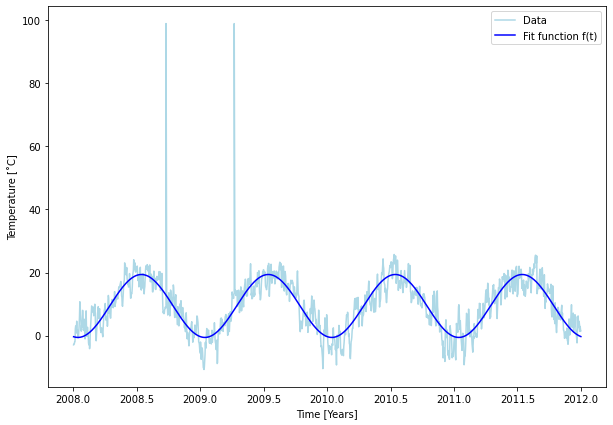

In [48]:
#Task 5

data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=" ", names=['year', 'temp'])
print(data.head())
data = data[(data['year'] >= 2008) & (data['year'] <= 2012)]
print(data.head())

def fit_function(time,a,b,c):
    return a*np.cos(2*np.pi*time + b) + c

time = data['year'].to_numpy()
temp = data['temp'].to_numpy()

param, cov = optimize.curve_fit(fit_function, time, temp)

a,b,c = param #best-fit Parameters

# Print of the best-fit parameters
print('\nParameters a,b,c from the fit_function():')
print("a = %.4f" % a)
print("b = %.4f" % b)
print("c = %.4f" % c,'\n')

print('\nThe b paramter is the phase of the cosine function.')
print('t represents time in years.')


print('\nAverage temperature from the data:', np.mean(temp),'˚C')

t_range = np.linspace(time.min(),time.max(),len(time)) 
temp_from_fit_fx = [fit_function(t,a,b,c) for t in t_range]

print('\nAverage temperature from the model:', np.mean(temp_from_fit_fx),'˚C')
print('Typical cold day in Munich from the model:', np.min(temp_from_fit_fx),'˚C')
print('Typical hot day in Munich from the model:', np.max(temp_from_fit_fx),'˚C')

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))

ax1.plot(time, temp, label = 'Data', color='lightblue')
ax1.plot(time, fit_function(time,a,b,c), color = 'blue', label = 'Fit function f(t)')
ax1.set_xlabel('Time [Years]')
ax1.set_ylabel('Temperature [˚C]')
ax1.legend()
plt.show()




Parameters a,b,c from the fit_fun_g():
a = -9.9822
b = 1.0014
c = -5.9032
d = 9.3981 

Average temperature from the data: 9.384097734976043 ˚C

Average temperature from the model: 9.385759108610692 ˚C
Typical cold day in Munich from the model: -0.584058828026162 ˚C
Typical hot day in Munich from the model: 19.38030627793175 ˚C


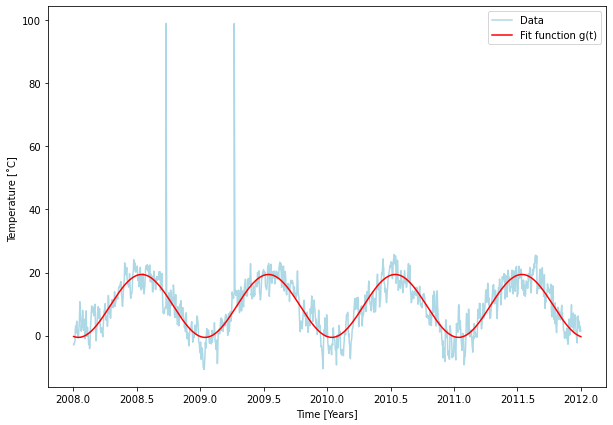

In [49]:
def fit_fun_g(time,a,b,c,d):
    return a*np.cos(2*np.pi*time*b + c) + d

param, cov = optimize.curve_fit(fit_fun_g, time, temp)

a,b,c,d = param #Best Fit Parameters

# Print of the best-fit parameters
print('\nParameters a,b,c from the fit_fun_g():')
print("a = %.4f" % a)
print("b = %.4f" % b)
print("c = %.4f" % c)
print("d = %.4f" % d,'\n')


print('Average temperature from the data:', np.mean(temp),'˚C')

t_range = np.linspace(time.min(),time.max(),len(time)) 
temp_from_fit_gx = [fit_fun_g(t,a,b,c,d) for t in t_range]

print('\nAverage temperature from the model:', np.mean(temp_from_fit_gx),'˚C')
print('Typical cold day in Munich from the model:', np.min(temp_from_fit_gx),'˚C')
print('Typical hot day in Munich from the model:', np.max(temp_from_fit_gx),'˚C')

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))

ax1.plot(time, temp, label = 'Data', color='lightblue')
ax1.plot(time, fit_fun_g(time,a,b,c,d), color = 'red', label = 'Fit function g(t)')
ax1.set_xlabel('Time [Years]')
ax1.set_ylabel('Temperature [˚C] ')
ax1.legend()
plt.show()


In [50]:
# RSS
def RSS(temp, temp_from_model):
    return np.sum((temp-temp_from_model)**2)

rss_f = RSS(temp,temp_from_fit_fx)
rss_g = RSS(temp,temp_from_fit_gx)

print('\nRSS for fit function f(x):',rss_f)
print('\nRSS for fit function g(x):',rss_g)


RSS for fit function f(x): 34351.31845557025

RSS for fit function g(x): 34343.47707276334


In [51]:
# define alpha
alpha = 0.05 

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

# run F-test: f(t) vs g(t)
ndof_f = 2 # number of parameters - 1 
ndof_g = 3
N = len(temp)
print('F-test f(t) vs g(t):')
pval_1_vs_2 = Ftest(rss_f, rss_g, ndof_f, ndof_g, N, verbose=True)

F-test f(t) vs g(t):
p-value: 0.564 , additional parameter necessary: NO
